# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


# 1. Load the data into the pandas environment and identify some basic details of the dataset.

In [2]:
data=pd.read_csv('employee.csv')
data

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
6,James Authur,54.0,NaN,F,Operations,G3,53
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


In [3]:
data.info

<bound method DataFrame.info of             name   age   income gender  department grade  performance_score
0    Allen Smith  45.0      NaN    NaN  Operations    G3                723
1        S Kumar   NaN  16000.0      F     Finance    G0                520
2    Jack Morgan  32.0  35000.0      M     Finance    G2                674
3      Ying Chin  45.0  65000.0      F       Sales    G3                556
4  Dheeraj Patel  30.0  42000.0      F  Operations    G2                711
5  Satyam Sharma   NaN  62000.0    NaN       Sales    G3                649
6   James Authur  54.0      NaN      F  Operations    G3                 53
7     Josh Wills  54.0  52000.0      F     Finance    G3                901
8       Leo Duck  23.0  98000.0      M       Sales    G4                709>

In [4]:
data.describe()

,age,income,performance_score
count,7.000000,7.000000,9.000000
mean,40.428571,52857.142857,610.666667
std,12.204605,26028.372797,235.671912
min,23.000000,16000.000000,53.000000
25%,31.000000,38500.000000,556.000000
50%,45.000000,52000.000000,674.000000
75%,49.500000,63500.000000,711.000000
max,54.000000,98000.000000,901.000000


# 2. Reset the index as "name".

In [5]:
data.set_index(data['name'], inplace=True)
data

,name,age,income,gender,department,grade,performance_score
name,,,,,,,
Allen Smith,Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
James Authur,James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,Leo Duck,23.0,98000.0,M,Sales,G4,709


# 3. Select rows for specific names Jack Morgan and Josh wills

In [6]:
data.loc[['Jack Morgan','Josh Wills']]

,name,age,income,gender,department,grade,performance_score
name,,,,,,,
Jack Morgan,Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,Josh Wills,54.0,52000.0,F,Finance,G3,901


# 4. Select data for multiple values "Sales" and “Finance”

In [7]:
sales=data[data['department']=='Sales']
finance=data[data['department']=='Finance']
pd.concat([sales,finance],axis=0)

,name,age,income,gender,department,grade,performance_score
name,,,,,,,
Ying Chin,Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Leo Duck,Leo Duck,23.0,98000.0,M,Sales,G4,709
S Kumar,S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,Josh Wills,54.0,52000.0,F,Finance,G3,901


# 5. Display employee who has more than 700 performance score.

In [8]:
data[data['performance_score']>700]

,name,age,income,gender,department,grade,performance_score
name,,,,,,,
Allen Smith,Allen Smith,45.0,NaN,NaN,Operations,G3,723
Dheeraj Patel,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Josh Wills,Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,Leo Duck,23.0,98000.0,M,Sales,G4,709


# 6. Display employee who has more than 500 and less than 700 performance score

In [9]:
data[(data['performance_score']>500)&(data['performance_score']<700)]

,name,age,income,gender,department,grade,performance_score
name,,,,,,,
S Kumar,S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649


# 7. Check and handle missing values in the dataset.

In [10]:
data.isna().sum()

name                 0
age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [11]:
#filling missing values in 'age' and 'income' column using thieir median

for i in ['age','income']:
    data[i]=data[i].fillna(data[i].median())     
data

,name,age,income,gender,department,grade,performance_score
name,,,,,,,
Allen Smith,Allen Smith,45.0,52000.0,NaN,Operations,G3,723
S Kumar,S Kumar,45.0,16000.0,F,Finance,G0,520
Jack Morgan,Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,Satyam Sharma,45.0,62000.0,NaN,Sales,G3,649
James Authur,James Authur,54.0,52000.0,F,Operations,G3,53
Josh Wills,Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,Leo Duck,23.0,98000.0,M,Sales,G4,709


In [12]:
#filling missing values in 'gender' column using mode

data['gender'] = data['gender'].fillna(data['gender'].mode()[0])
data

,name,age,income,gender,department,grade,performance_score
name,,,,,,,
Allen Smith,Allen Smith,45.0,52000.0,F,Operations,G3,723
S Kumar,S Kumar,45.0,16000.0,F,Finance,G0,520
Jack Morgan,Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,Satyam Sharma,45.0,62000.0,F,Sales,G3,649
James Authur,James Authur,54.0,52000.0,F,Operations,G3,53
Josh Wills,Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,Leo Duck,23.0,98000.0,M,Sales,G4,709


In [13]:
data.isna().sum()

name                 0
age                  0
income               0
gender               0
department           0
grade                0
performance_score    0
dtype: int64

# 8. Check the outliers and handle outliers in performance score using Percentiles.

In [14]:
data.dtypes

name                  object
age                  float64
income               float64
gender                object
department            object
grade                 object
performance_score      int64
dtype: object

Text(0.5, 1.0, 'Box plot of Performance score')

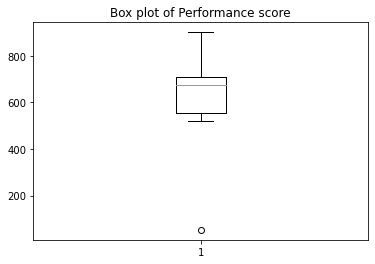

In [15]:
plt.boxplot(data['performance_score'])
plt.title('Box plot of Performance score')

In [16]:
Q1=np.percentile(data['performance_score'],25,interpolation='midpoint')
Q2=np.percentile(data['performance_score'],50,interpolation='midpoint')
Q3=np.percentile(data['performance_score'],75,interpolation='midpoint')
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print("Q1=",Q1)
print("Q2=",Q2)
print("Q3=",Q3)
print("IQR=",IQR)
print("low_lim=",low_lim)
print("up_lim=",up_lim)

Q1= 556.0
Q2= 674.0
Q3= 711.0
IQR= 155.0
low_lim= 323.5
up_lim= 943.5


In [17]:
outlier=[]
for x in data['performance_score']:
    if((x>up_lim)or(x<low_lim)):
        outlier.append(x)
outlier

[53]

In [18]:
ind1=data['performance_score']<low_lim
data.loc[ind1].index

Index(['James Authur'], dtype='object', name='name')

In [19]:
data.drop(['James Authur'],inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x7faaf81de3d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7faaf81deaf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7faaf81de040>],
 'medians': [<matplotlib.lines.Line2D at 0x7faaf825d250>],
 'fliers': [<matplotlib.lines.Line2D at 0x7faaf825d5e0>],
 'means': []}

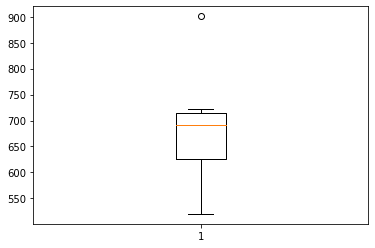

In [20]:
plt.boxplot(data['performance_score'])

# 9. Check the gender column and do Dummy encoding.

In [21]:
data['gender']

name
Allen Smith      F
S Kumar          F
Jack Morgan      M
Ying Chin        F
Dheeraj Patel    F
Satyam Sharma    F
Josh Wills       F
Leo Duck         M
Name: gender, dtype: object

In [22]:
pd.get_dummies(data['gender'])

,F,M
name,,
Allen Smith,1,0
S Kumar,1,0
Jack Morgan,0,1
Ying Chin,1,0
Dheeraj Patel,1,0
Satyam Sharma,1,0
Josh Wills,1,0
Leo Duck,0,1


# 10.Do the standard scaling on the feature performance score.

In [29]:
data['performance_score'].describe()

count      8.00000
mean     680.37500
std      116.16729
min      520.00000
25%      625.75000
50%      691.50000
75%      714.00000
max      901.00000
Name: performance_score, dtype: float64

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


In [26]:
y= data['performance_score']
X = data.drop('performance_score',axis=1)
X = X.drop('gender',axis=1)
X = X.drop('department',axis=1)
X = X.drop('grade',axis=1)
X = X.drop('name',axis=1)

In [33]:
standardisation = preprocessing.StandardScaler()
X = standardisation.fit_transform(X)
X=pd.DataFrame(X)
X.describe()

,0,1
count,8.000000e+00,8.000000e+00
mean,-2.775558e-17,5.551115e-17
std,1.069045e+00,1.069045e+00
min,-1.744151e+00,-1.630217e+00
25%,-8.656157e-01,-5.544955e-01
50%,5.297052e-01,-3.326973e-02
75%,5.297052e-01,4.435964e-01
max,1.459919e+00,2.007274e+00
